In [1]:
!python flow/visualize/visualizer_rllib.py\
/home/michael/ray_results/singleagent_figure_eight/PPO_AccelEnv-v0_3cbeb_00000_0_2022-09-11_20-50-11/ 111\
--num_rollouts 10


Bad key text.latex.preview in file /home/michael/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/michael/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/michael/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a 

### Trial Results Directory Name

In [2]:
results_dir_name = "trial_results"

## Mean Over Rollout

In [3]:
import numpy as np

mean_collector = []

with open(f"./michael_files/{results_dir_name}/avg_velocity.txt", "r+") as f:
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])
        mean_vehs = np.mean(data)
        mean_collector.append(mean_vehs)
        print(f"Mean Velocity Over Rollout: {mean_vehs}")
        with open(f"./michael_files/{results_dir_name}/mean_rollout_velocity.txt", "a") as g:
            g.write(f"Mean Velocity Over Rollout: {mean_vehs}\n")

with open(f"./michael_files/{results_dir_name}/mean_rollout_velocity.txt", "a") as g:
    mean_rollout = np.mean(mean_collector)
    std_rollout = np.std(mean_collector)
    var_rollout = np.var(mean_collector)
    
    g.write(f"Mean of Rollouts: {mean_rollout}\n")
    g.write(f"Std of Rollouts: {std_rollout}\n")
    g.write(f"Variance of Rollouts: {var_rollout}\n")

Mean Velocity Over Rollout: 1.7454005837262472
Mean Velocity Over Rollout: 1.7990045798253487
Mean Velocity Over Rollout: 1.684540065361732
Mean Velocity Over Rollout: 1.7497672485286855
Mean Velocity Over Rollout: 1.7960694676695246
Mean Velocity Over Rollout: 1.7798341750528586
Mean Velocity Over Rollout: 1.8050187630578454
Mean Velocity Over Rollout: 1.8194129206689573
Mean Velocity Over Rollout: 1.7658976862840472
Mean Velocity Over Rollout: 1.808749199549472


## Mean and Min for Last 100 Seconds

In [4]:
import numpy as np

mean_collector = []

with open(f"./michael_files/{results_dir_name}/avg_velocity.txt", "r+") as f:
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])
        mean_last_100_seconds = np.mean(data[-1000:])
        mean_collector.append(mean_last_100_seconds)
        print(f"Mean Last 100 Seconds: {mean_last_100_seconds}")
        with open(f"./michael_files/{results_dir_name}/last_100_seconds.txt", "a") as g:
            g.write(f"Mean Last 100 Seconds: {mean_last_100_seconds}\n")

print(f"Mean of last 100 secs over rollouts: {np.mean(mean_collector)}")

with open(f"./michael_files/{results_dir_name}/last_100_seconds.txt", "a") as g:
    g.write(f"Mean of last 100 secs over rollouts: {np.mean(mean_collector)}\n")
    
    std_100 = np.std(mean_collector)
    var_100 = np.var(mean_collector)
    
    g.write(f"Std of last 100 secs over rollouts: {std_100}\n")
    g.write(f"Variance of last 100 secs over rollouts: {var_100}\n")

Mean Last 100 Seconds: 1.1222800996996285
Mean Last 100 Seconds: 1.20335292502738
Mean Last 100 Seconds: 1.0348297511700815
Mean Last 100 Seconds: 1.133921406452273
Mean Last 100 Seconds: 1.1964511317949154
Mean Last 100 Seconds: 1.1789968110482274
Mean Last 100 Seconds: 1.2097763549633196
Mean Last 100 Seconds: 1.2331942289552917
Mean Last 100 Seconds: 1.1596649052082526
Mean Last 100 Seconds: 1.2209693135261734
Mean of last 100 secs over rollouts: 1.1693436927845544


In [5]:
import numpy as np

with open(f"./michael_files/{results_dir_name}/min_velocity.txt", "r+") as f:
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])
        min_last_100_seconds = np.min(data[-1000:])
        print(f"Min Last 100 Seconds: {min_last_100_seconds}")
        with open(f"./michael_files/{results_dir_name}/last_100_seconds.txt", "a") as g:
            g.write(f"Min Last 100 Seconds: {min_last_100_seconds}\n")

Min Last 100 Seconds: 0.37795301644868906
Min Last 100 Seconds: 0.37615815923426144
Min Last 100 Seconds: 0.3498029726583698
Min Last 100 Seconds: 0.34268888059216024
Min Last 100 Seconds: 0.38226116226514834
Min Last 100 Seconds: 0.3532512747788682
Min Last 100 Seconds: 0.3773006589540802
Min Last 100 Seconds: 0.38006981807897
Min Last 100 Seconds: 0.3338091633334612
Min Last 100 Seconds: 0.35723857098926975


## Charting Avg. Velocity for All Vehicles


Bad key text.latex.preview in file /home/michael/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/michael/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/michael/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a 

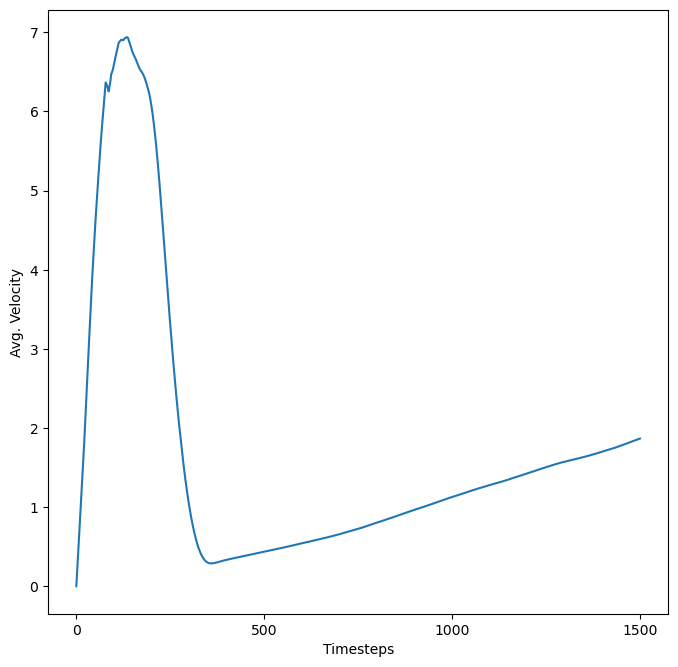

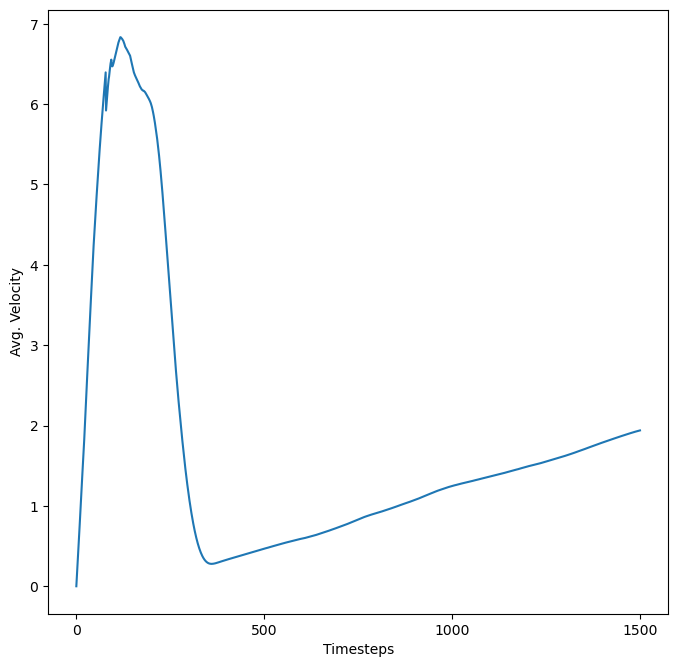

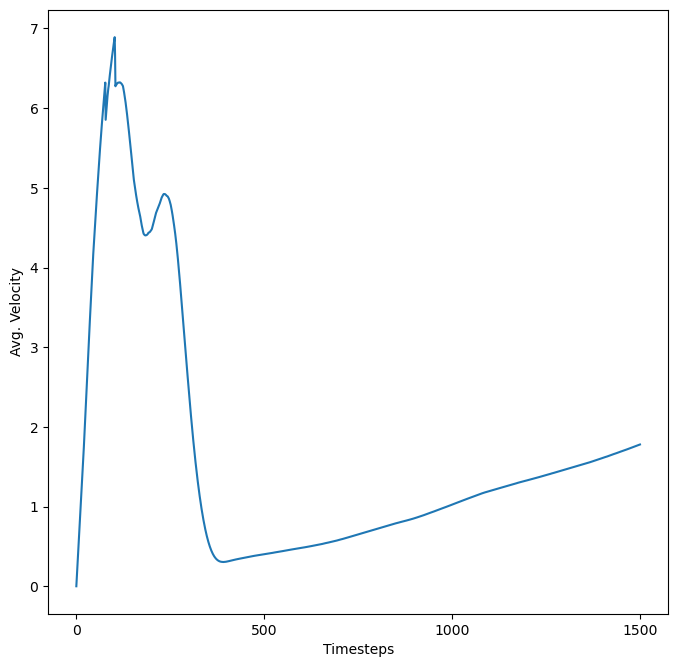

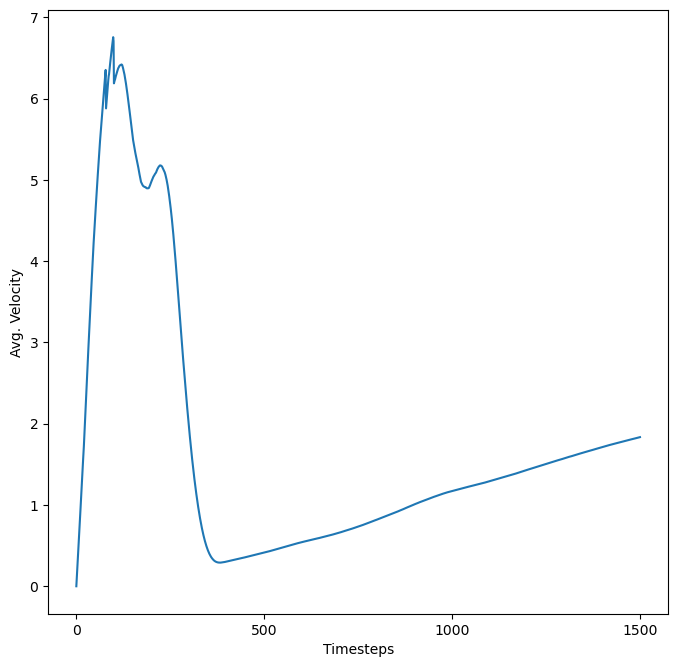

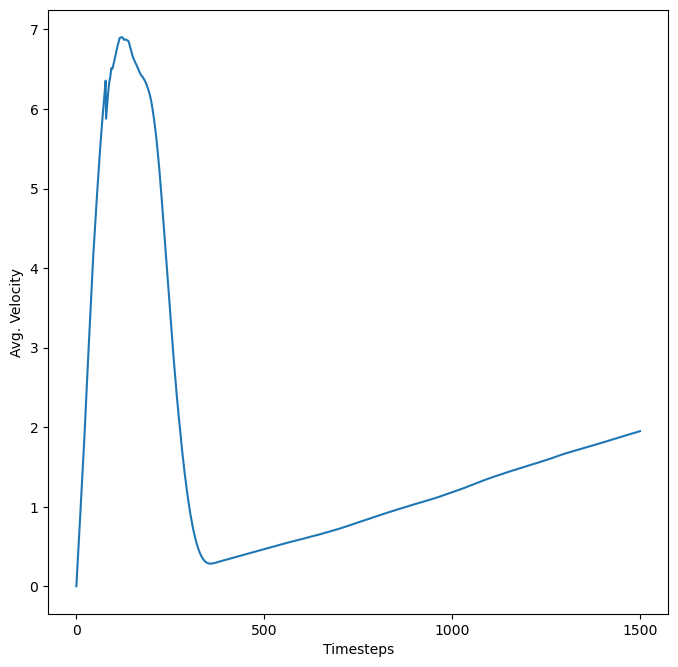

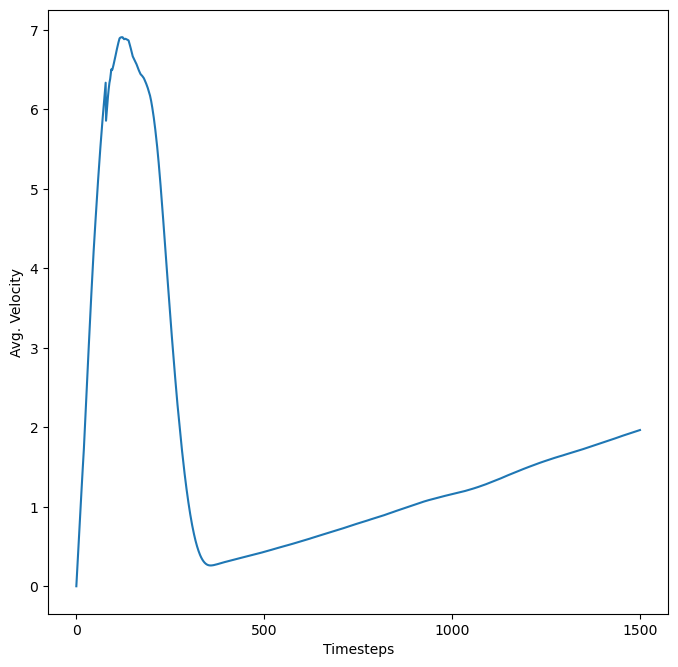

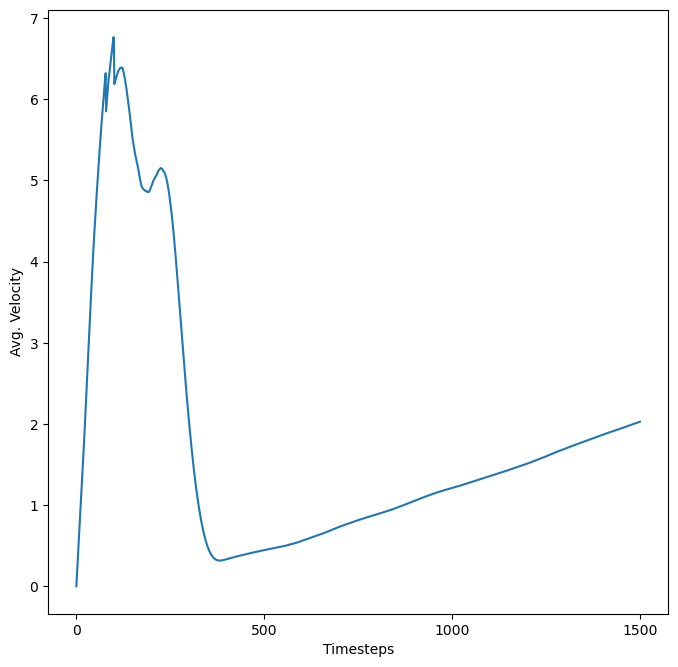

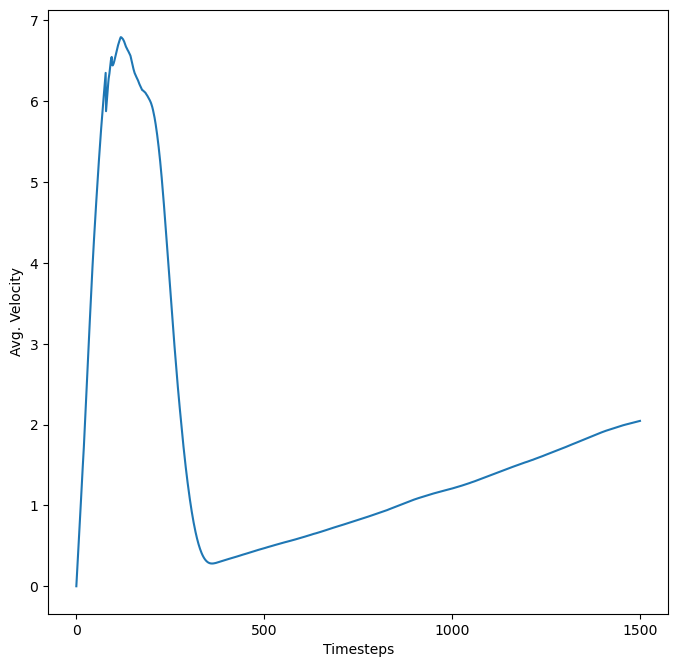

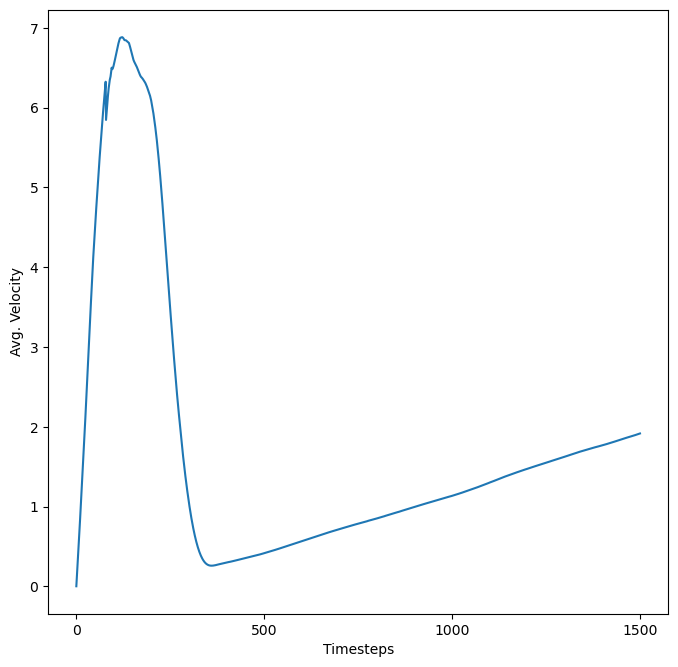

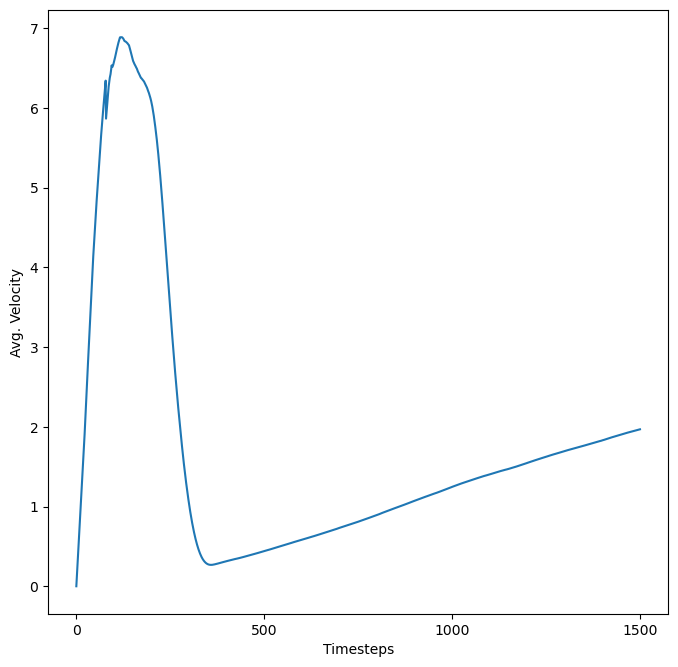

In [6]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/{results_dir_name}/avg_velocity.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("Avg. Velocity")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/{results_dir_name}/avg_velocity{count}.png")
        
        count += 1

## Charting RL Velocity

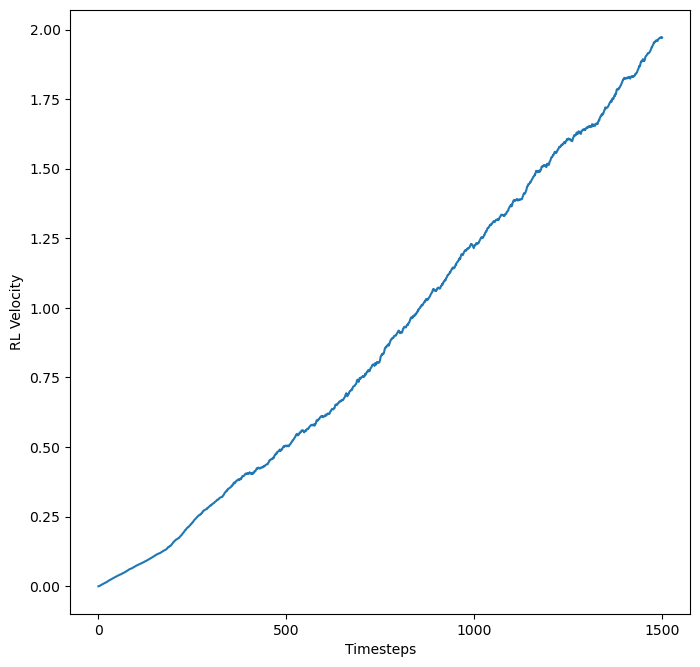

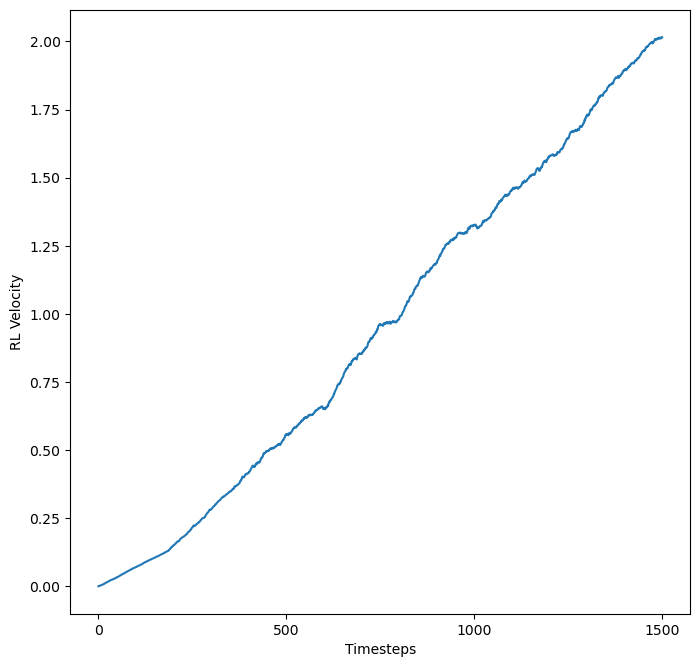

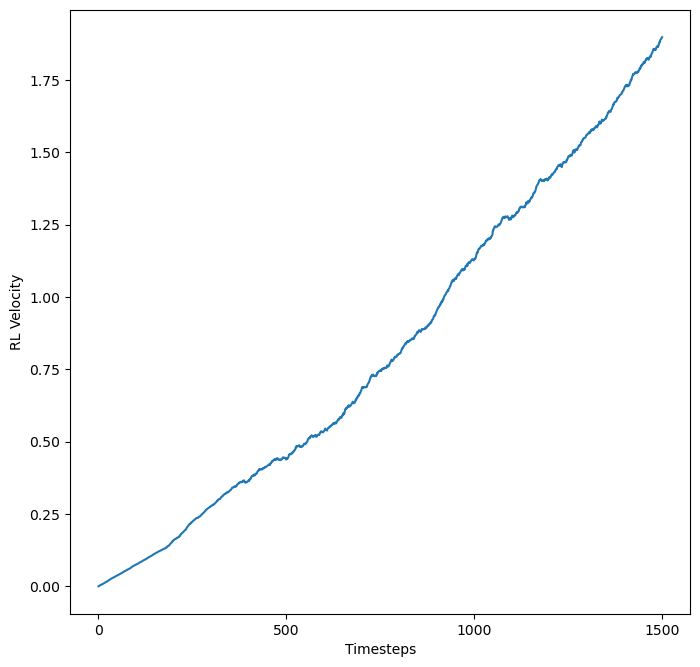

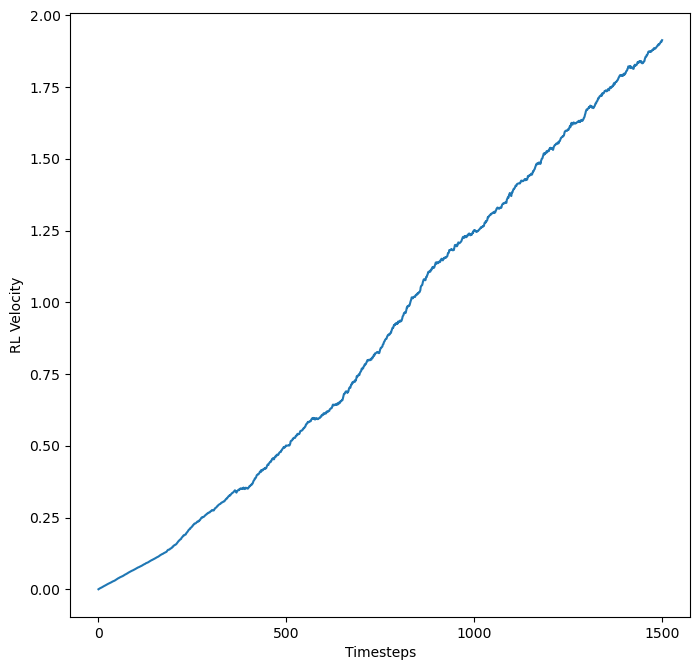

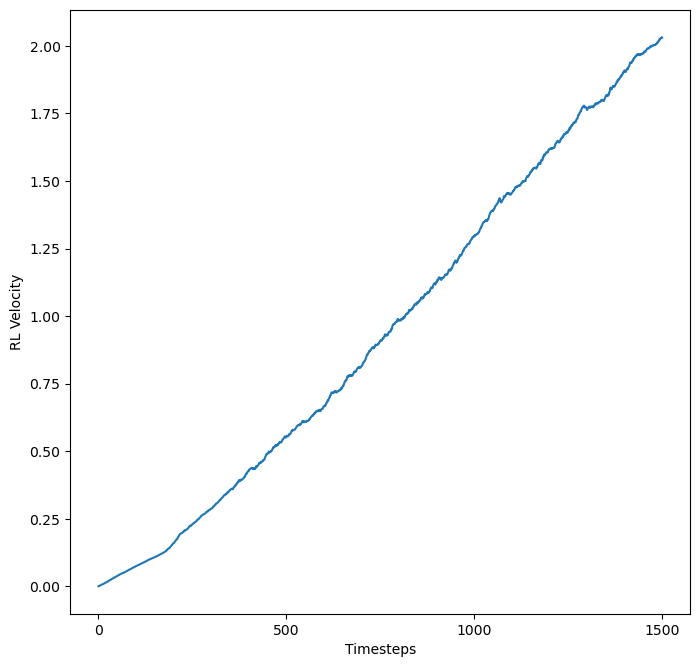

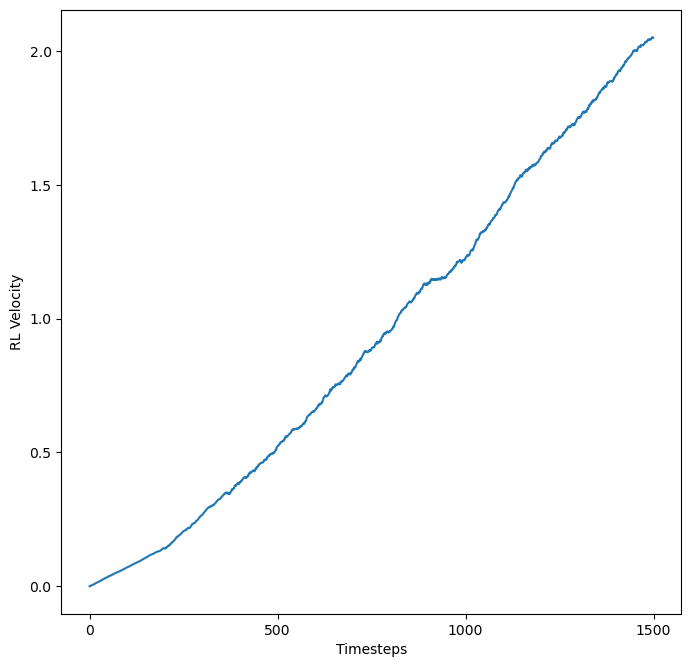

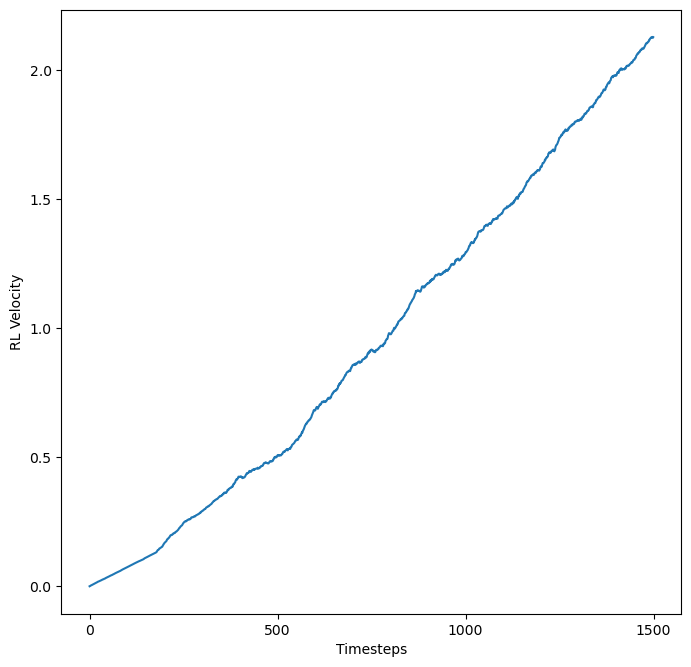

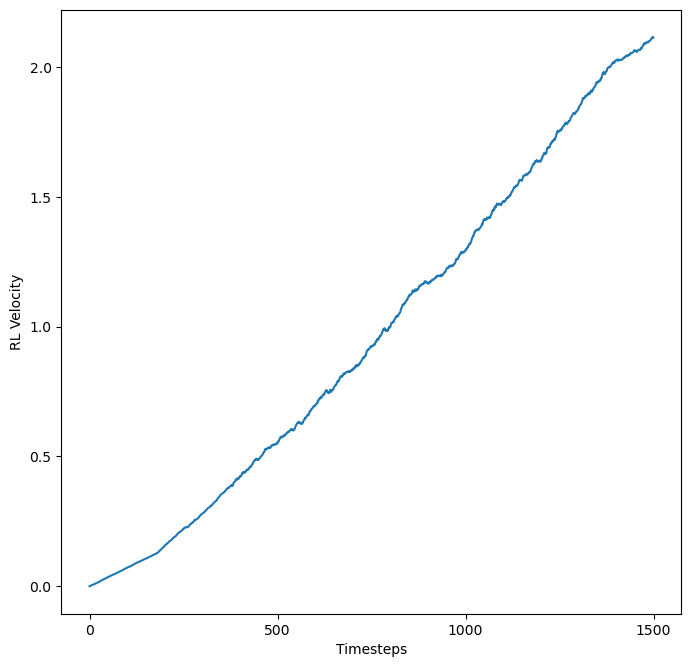

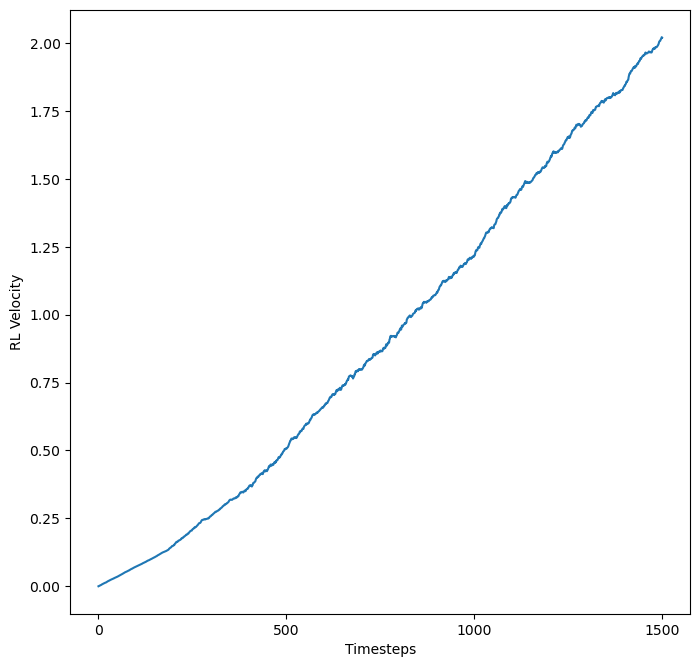

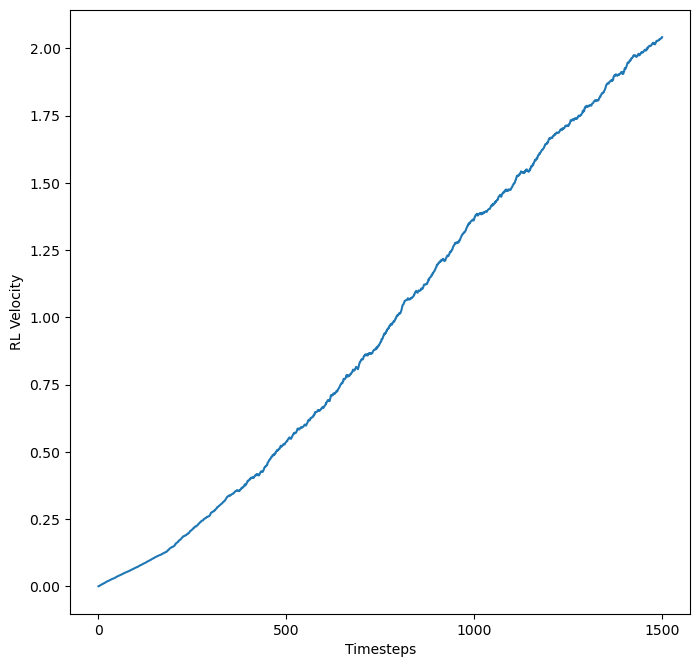

In [7]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/{results_dir_name}/rl_velocity.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("RL Velocity")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/{results_dir_name}/rl_velocity{count}.png")
        
        count += 1

## Charting RL Realized Acceleration

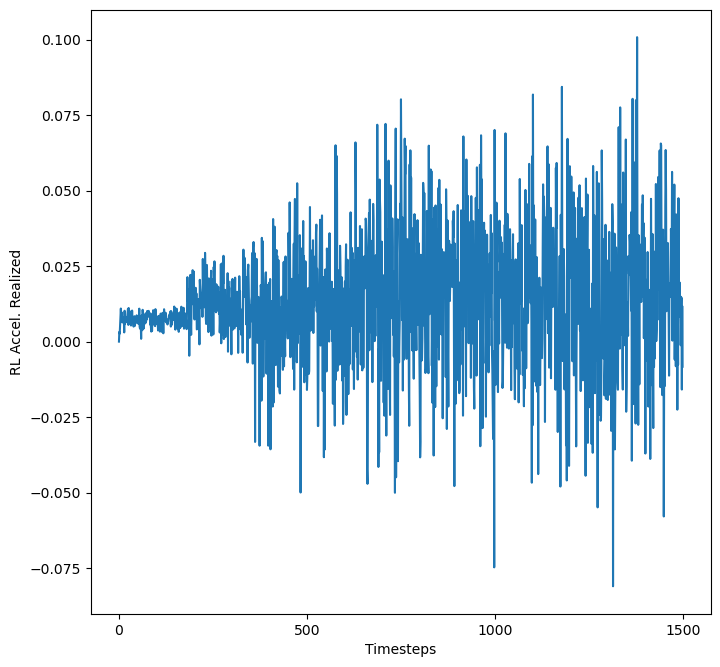

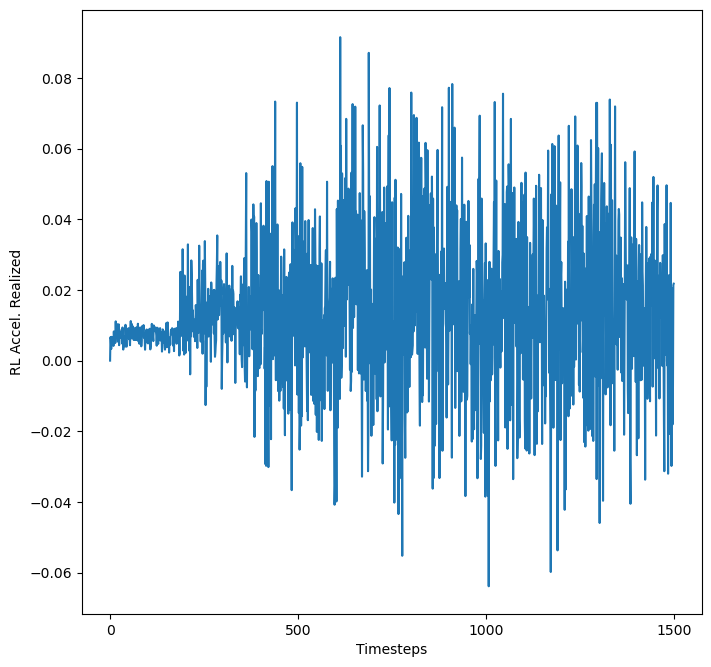

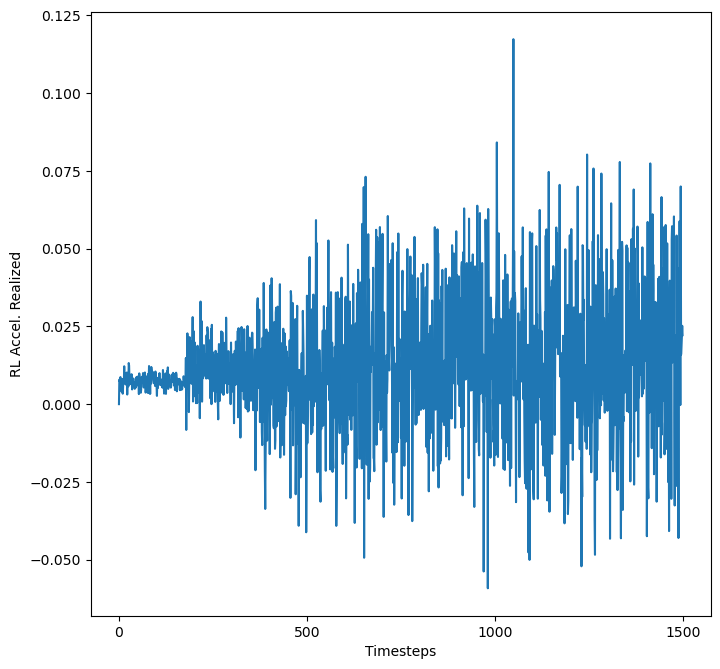

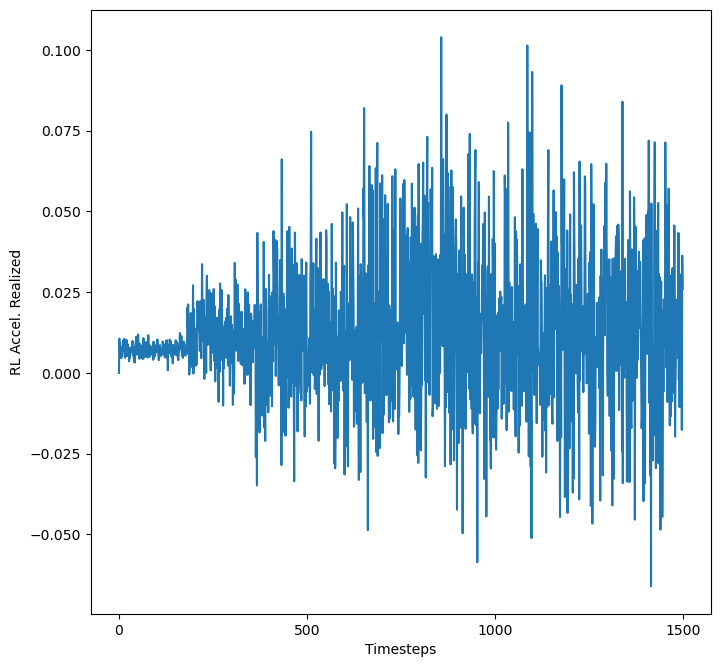

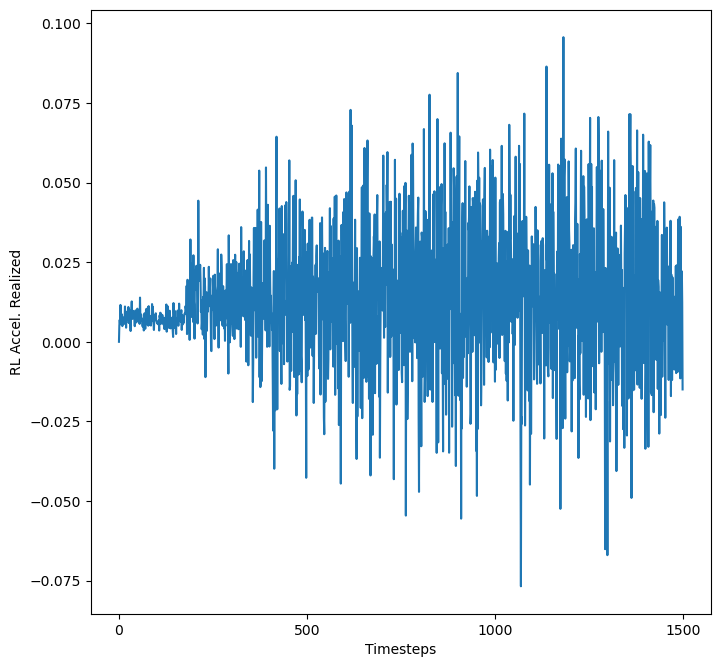

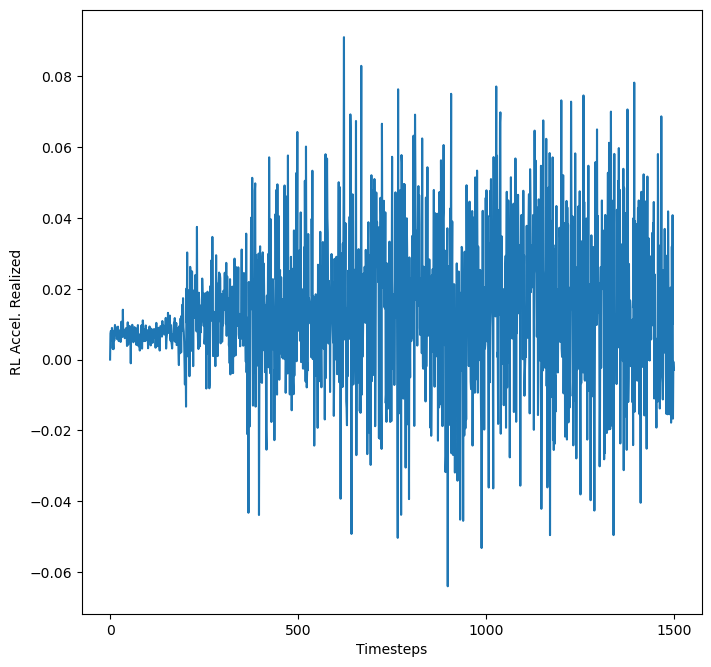

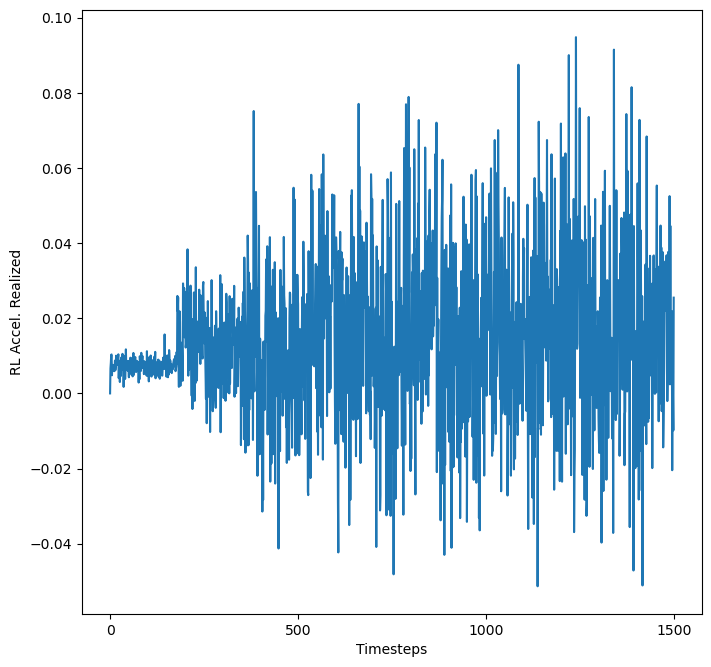

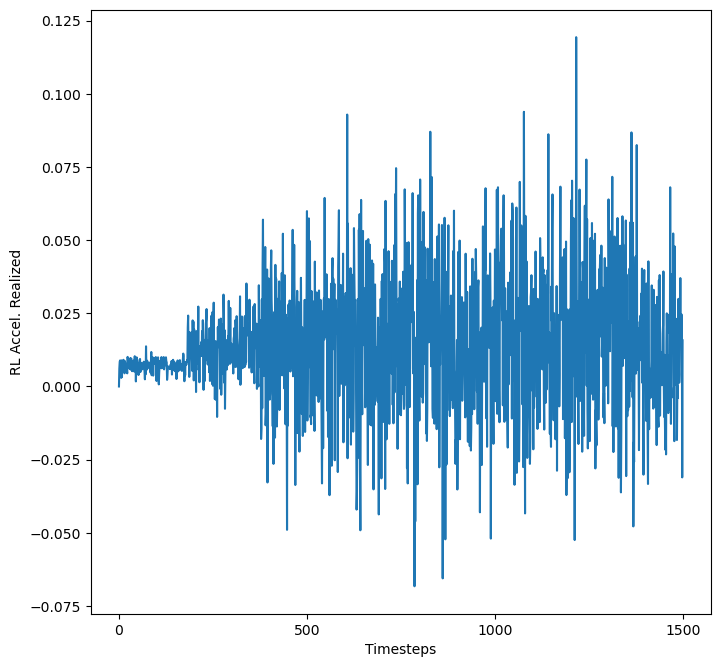

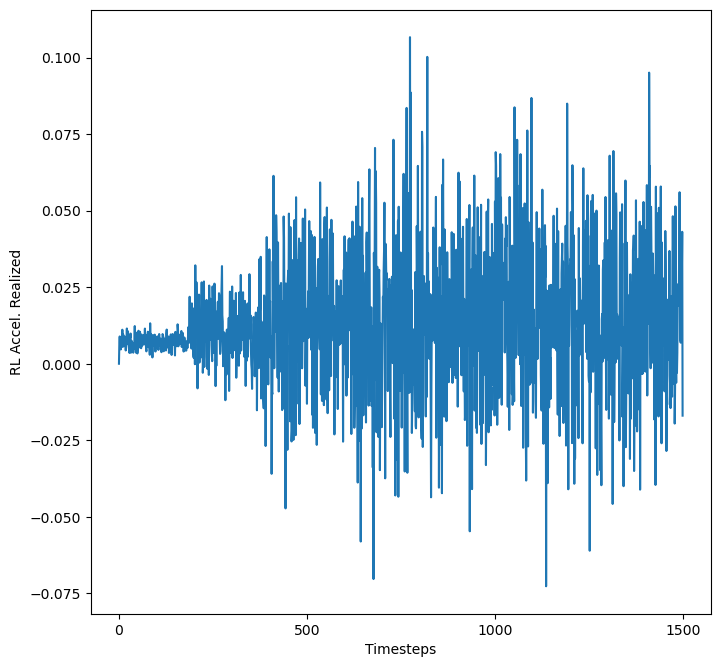

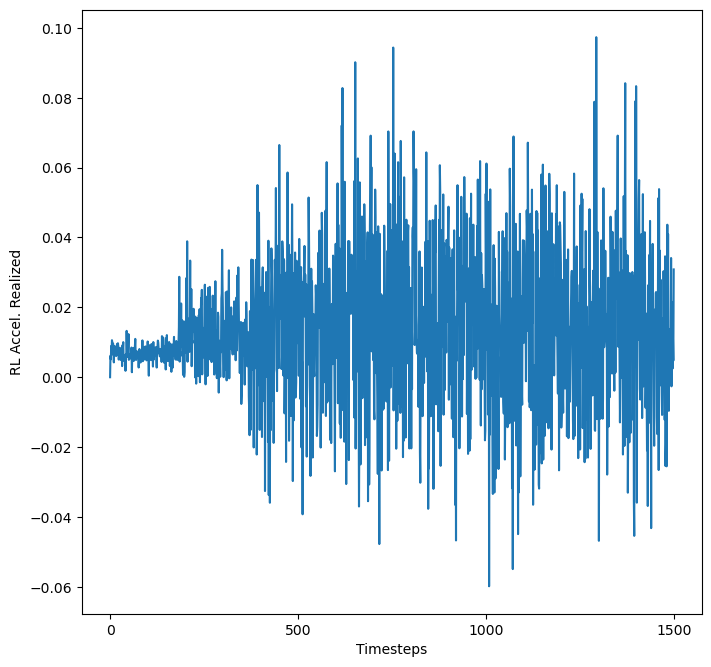

In [8]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/{results_dir_name}/rl_accel_realized.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("RL Accel. Realized")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/{results_dir_name}/rl_accel_realized{count}.png")
        
        count += 1